# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [12]:
import numpy as np

np.ones((3,4), dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [13]:
np.diagflat([1,2,3,4], -1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [14]:
chess = np.zeros((8,8), dtype="int")
chess[1::2,::2] = 1
chess[::2,1::2] = 1
chess

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [15]:
vect = np.random.randint(10,high=100, size=7)
print(vect)
vect[vect % 2 != 0] = -vect[vect % 2 != 0]
print(vect)

[89 94 71 54 63 80 12]
[-89  94 -71  54 -63  80  12]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [16]:
A = np.random.randint(10,100,(50,50))
B = np.random.randint(10,100,(50,50))
np.array_equal(np.dot(A,B).T, np.dot(B.T,A.T))

True

6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [17]:
u = np.random.randint(10,21,5)
v = np.random.randint(10,21,5)
uv = u[:, np.newaxis] * v
np.array_equal(np.outer(u,v), uv)

True

7. Vytvořte šachovnicovou matici pomocí `tile`.

In [18]:
a = np.tile([0,1],4).reshape(1,8)
b = np.tile([1,0],4).reshape(1,8)
c = np.concatenate((a,b), axis=0)
np.tile(c, (4,1))

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [21]:
import numpy as np

def integer_spiral_numpy(n, nums=[]):
    if len(nums) == 0: # this is for the exercise with primes
        nums = np.arange(1, n**2 + 1)
    idx = np.array([n//2,n//2]) # default starting point
    stop = 1 # stop index for selecting elements from nums
    A = np.zeros((n,n)) # output matrix
    A[idx[0],idx[1]] = 1 # set middle to 1
    for ind in range(1,n//2 + 1):
        i,j = idx # position of the current middle
        n,w,s,e = np.split(nums[stop:stop+ind*8], 4) # get elements for each edge
        A[i-1, j-2*ind+1:j+1] += n[::-1] # north
        A[i:i+2*ind,j-2*ind+1] += w # west
        A[i+2*ind-1, j-2*ind+2:j+2] += s # south
        A[i-1:i+2*ind-1, j+1] += e[::-1] # east
        stop += ind*8 # update stop index
        idx += np.array([-1,1]) # change starting position
    return A

In [22]:
n = 1001
A = integer_spiral(n)
# print(A)
B = integer_spiral_numpy(n)
# print(B)

np.array_equal(A,B)

True

## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
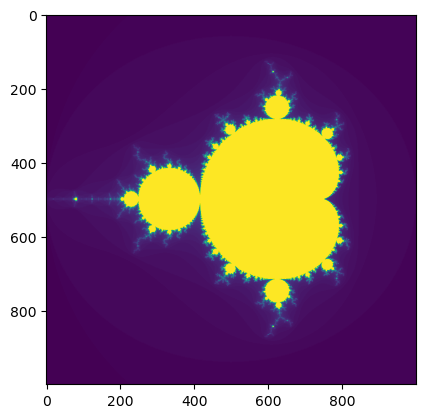

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [34]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    # TODO naimplementujte viz zadání
    xdim = np.linspace(start = x_min,stop = x_max,num=n)
    ydim = np.linspace(start = y_min,stop = y_max,num=n)
    xdims,ydims = np.meshgrid(xdim,ydim) # complex numbers c
    c = xdims * np.ones((n,n), dtype="complex") + ydims*1j*np.ones((n,n),dtype="complex")
    divergence_matrix = np.zeros((n,n))
    mid_matrix = np.zeros((n,n))

    for i in range(k):
        mid_matrix = mid_matrix ** 2 + c
        abs_mat = np.abs(mid_matrix)
        divergence_matrix[abs_mat > 2] = i
        mid_matrix[abs_mat > 2] = 0
        c[abs_mat > 2] = 0

    return divergence_matrix 


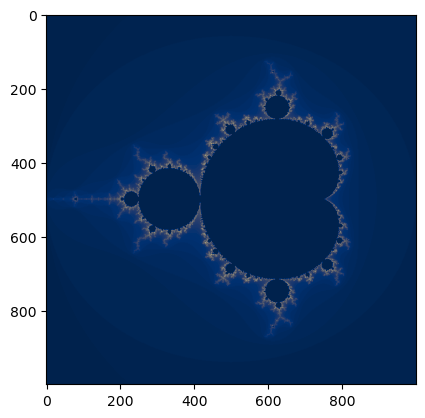

In [35]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix,cmap="cividis")

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

<Figure size 640x480 with 0 Axes>

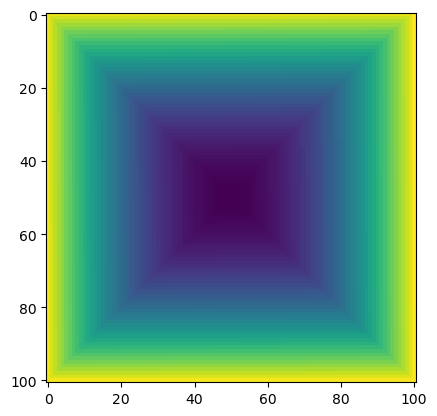

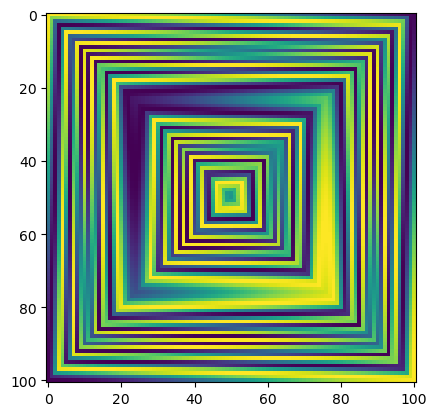

<Figure size 640x480 with 0 Axes>

In [36]:
A = integer_spiral_numpy(101)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))
plt.figure()

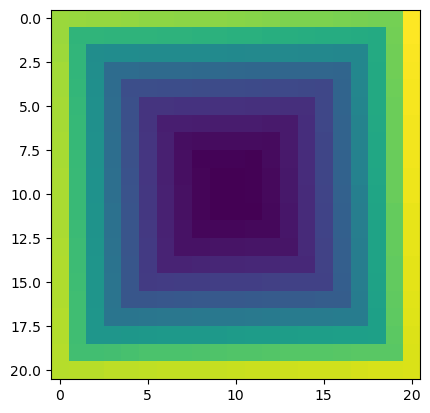

In [37]:
def isPrime(p):
    for i in range(2,p-1):
        if p % i == 0:
            return False
    return True

def nprimes(n:int):
    res = [1,2]
    c = 3
    while len(res) != n:
        if isPrime(c):
            res.append(c)
        c+=1
    return res

n = 21
arr = np.arange(1, n**2+1)
primes = np.array(nprimes(len(arr)))
A = integer_spiral_numpy(n, primes)
plt.imshow(A)